# 주제 : 데이터 분석으로 심부전증을 예방할 수 있을까?
----------

## 실습 가이드
1. 데이터를 다운로드
2. 필요한 라이브러리 설치.
   
    
## 데이터 소개
    -  Heart Failure Prediction 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    heart_failure_clinical_records_dataset.csv
    
    - 컬럼 정의서
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


## 최종 목표
    - 의료 데이터 & 분석
    - Pandas 라이브러리 사용법 이해
    - 데이터 시각화를 통한 인사이트 습득 
    - Scikit-learn 기반의 모델 학습 
    - Classification 모델의 학습 및 평가

## Step 0. 의료 데이터셋에 대하여

### 의료 데이터의 수집


### 의료 데이터 분석의 현재


### Accuracy, Precision, 그리고 Recall

## Step 1. 데이터셋 준비하기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats

In [12]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME']='omtaeski'
os.environ['KAGGLE_KEY']='dba319acfe7b18ce4c060d204a8fac48'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [14]:
# Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data
#!unzip '*.zip'


  0%|          | 0.00/3.97k [00:00<?, ?B/s]
100%|##########| 3.97k/3.97k [00:00<00:00, 2.01MB/s]
'unzip'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [15]:
os.listdir()

['.ipynb_checkpoints',
 'heart-failure-clinical-data.zip',
 'heart_failure_clinical_records_dataset.csv',
 'Part1',
 '강의소개및 개요',
 '데이터정제코드',
 '라이브러리 설치 및 Kaggle API 사용.ipynb',
 '분류모형research_1.ipynb']

### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [16]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

In [17]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [20]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [22]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### 문제 5. 수치형 데이터의 히스토그램 그리기

<AxesSubplot:xlabel='age', ylabel='Count'>

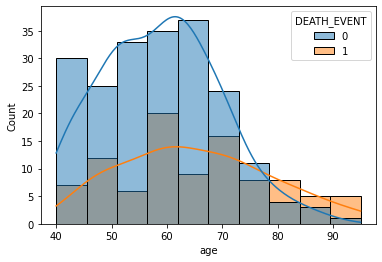

In [26]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기
sns.histplot(x='age',data=df,hue='DEATH_EVENT',kde=True)

In [29]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

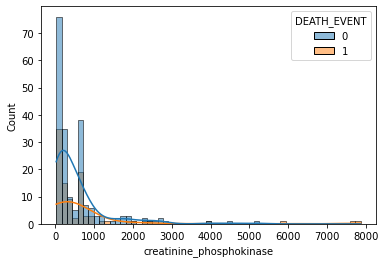

In [30]:
sns.histplot(x='creatinine_phosphokinase',data=df,hue='DEATH_EVENT',kde=True)

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

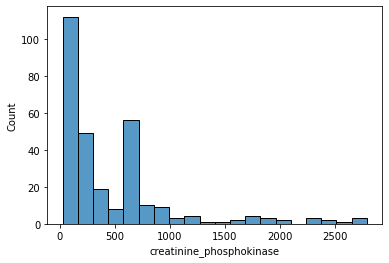

In [31]:
sns.histplot(data=df.loc[df['creatinine_phosphokinase']<3000,'creatinine_phosphokinase'])

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

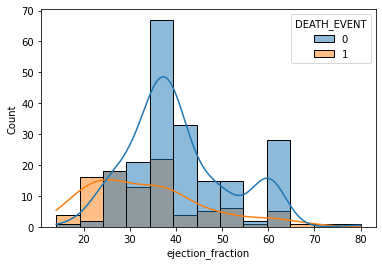

In [38]:
sns.histplot(x='ejection_fraction',data=df,bins=13,hue='DEATH_EVENT',kde=True)

<AxesSubplot:xlabel='platelets', ylabel='Count'>

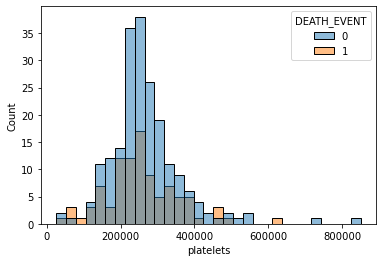

In [39]:
sns.histplot(x='platelets',data=df,hue='DEATH_EVENT')

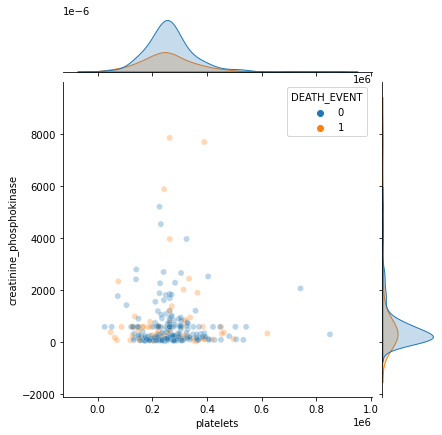

In [67]:
sns.jointplot(x='platelets',y='creatinine_phosphokinase',hue='DEATH_EVENT',data=df,alpha=0.3)

### T test 코드 연속형 변수의 사망, 생존 집단간의 통계적 차이 유무 확인 방법

In [48]:
group1=df[df['DEATH_EVENT']==0]
group2=df[df['DEATH_EVENT']==1]

In [49]:
print(len(group1))
print(len(group2))

203
96


In [50]:
#사망 집단, 생존 집단 나이 통계적 차이
t_stat,p_value=stats.ttest_ind(group1['age'],group2['age'])
print(t_stat)
print(p_value) #귀무가설 기각, 두 그룹간의 나이의 차이는 유의미함=>어느정도 영향력있는 변수로 볼 수 있음

-4.520613504937705
8.916762946533357e-06


In [53]:
# 크레아틴키나제 검사 결과 사망 생존 집단 차이

In [54]:
t_stat,p_value=stats.ttest_ind(group1['creatinine_phosphokinase'],group2['creatinine_phosphokinase'])
print(t_stat)
print(p_value) #크레아틴키나제 검사결과 집단간의 차이는 유의미하지 않음

-1.0831706812289021
0.27961124573614


In [55]:
t_stat,p_value=stats.ttest_ind(group1['ejection_fraction'],group2['ejection_fraction'])
print(t_stat)
print(p_value) #박출계수는 정상, 사망 집단 차이 유의미함

4.80562826839639
2.452897418208845e-06


In [56]:
t_stat,p_value=stats.ttest_ind(group1['platelets'],group2['platelets'])
print(t_stat)
print(p_value) #혈소판 수는 집단간의 차이 유의미하지 않음

0.8478681784251544
0.3971941540413678


In [57]:
t_stat,p_value=stats.ttest_ind(group1['serum_creatinine'],group2['serum_creatinine'])
print(t_stat)
print(p_value) #혈중 크레아틴 레벨 차이 유의미함

-5.306457599754319
2.1901978548979685e-07


In [58]:
t_stat,p_value=stats.ttest_ind(group1['serum_sodium'],group2['serum_sodium'])
print(t_stat)
print(p_value) #혈중 나트륨 수치 차이 유의미함

3.4300628699776157
0.0006889112363763486


### 범주형 변수간의 차이를 카이제곱 검정을 통해 집단간의 차이 검증하기

In [61]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df['DEATH_EVENT'], df['anaemia']))
print(f"카이제곱 통계량: {chi2_stat}")
print(f"P-값: {p_value}") #빈혈은 생존, 사망 집단간의 차이가 유의미하지 않음
print(f"자유도: {dof}")
print(expected)

카이제곱 통계량: 1.042175485287005
P-값: 0.3073160508415107
자유도: 1
[[115.4180602  87.5819398]
 [ 54.5819398  41.4180602]]


In [62]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df['DEATH_EVENT'], df['diabetes']))
print(f"카이제곱 통계량: {chi2_stat}")
print(f"P-값: {p_value}") #당뇨병은 생존, 사망 집단간의 차이가 유의미하지 않음
print(f"자유도: {dof}")
print(expected)

카이제곱 통계량: 0.0
P-값: 1.0
자유도: 1
[[118.13377926  84.86622074]
 [ 55.86622074  40.13377926]]


In [63]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df['DEATH_EVENT'], df['high_blood_pressure']))
print(f"카이제곱 통계량: {chi2_stat}")
print(f"P-값: {p_value}") #고혈압여부은 생존, 사망 집단간의 차이가 유의미하지 않음
print(f"자유도: {dof}")
print(expected)

카이제곱 통계량: 1.5434607612967581
P-값: 0.21410341199416902
자유도: 1
[[131.71237458  71.28762542]
 [ 62.28762542  33.71237458]]


In [64]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df['DEATH_EVENT'], df['sex']))
print(f"카이제곱 통계량: {chi2_stat}")
print(f"P-값: {p_value}") #남녀간 생존, 사망 집단간의 차이가 유의미하지 않음
print(f"자유도: {dof}")
print(expected)

카이제곱 통계량: 0.0
P-값: 1.0
자유도: 1
[[ 71.28762542 131.71237458]
 [ 33.71237458  62.28762542]]


In [65]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df['DEATH_EVENT'], df['smoking']))
print(f"카이제곱 통계량: {chi2_stat}")
print(f"P-값: {p_value}") #남녀간 생존, 사망 집단간의 차이가 유의미하지 않음
print(f"자유도: {dof}")
print(expected)

카이제곱 통계량: 0.007331473567119502
P-값: 0.9317652998235507
자유도: 1
[[137.82274247  65.17725753]
 [ 65.17725753  30.82274247]]


### 문제 6. Boxplot 계열을 이용하여 범주별 통계 확인하기


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

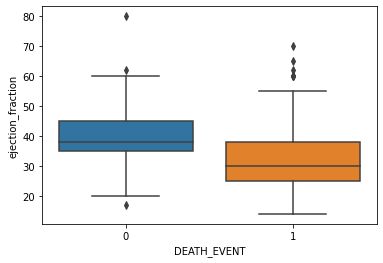

In [68]:
# seaborn의 Boxplot 계열(boxplot(), violinplot(), swarmplot())을 사용
sns.boxplot(x='DEATH_EVENT',y='ejection_fraction',data=df)

<AxesSubplot:xlabel='smoking', ylabel='ejection_fraction'>

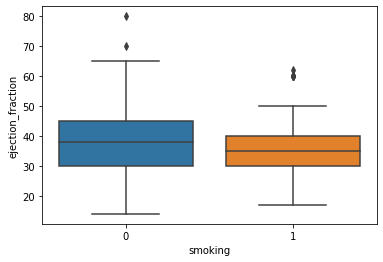

In [69]:
sns.boxplot(x='smoking',y='ejection_fraction',data=df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

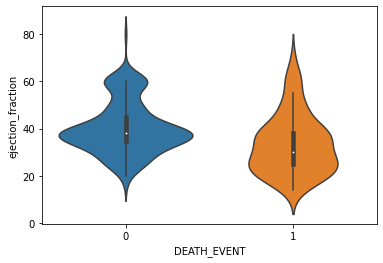

In [70]:
sns.violinplot(x='DEATH_EVENT',y='ejection_fraction',data=df)

C:\Users\user\anaconda3\envs\kwon\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

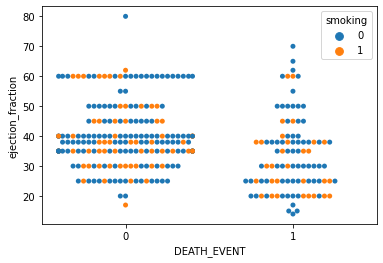

In [72]:
sns.swarmplot(x='DEATH_EVENT',y='ejection_fraction',data=df,hue='smoking')

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 7. StandardScaler를 이용하여 데이터 전처리하기


In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [114]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = df[['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df[['DEATH_EVENT']]

In [115]:
# 연속형 변수 표준화=> 각각의 수치가 다르기때문에 디폴트로 해주어야함=>통계학적 관전임
scaler =StandardScaler()
scaler.fit(X_num)
X_scaled=scaler.transform(X_num)
X_scaled=pd.DataFrame(X_scaled,index=X_num.index,columns=X_num.columns)

In [116]:
# 범주형 변수와 Concat
X=pd.concat([X_scaled,X_cat],axis=1)

In [117]:
X

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.537688,-0.007077,-1.109765e+00,-0.284552,1.447094,0,1,1,1,1
295,-0.491279,1.278215,-0.007077,6.802472e-02,-0.187726,0.539054,0,0,0,0,0
296,-1.333392,1.525979,1.854958,4.902082e+00,-0.575031,0.312044,0,1,0,0,0
297,-1.333392,1.890398,-0.007077,-1.263389e+00,0.005926,0.766064,0,0,0,1,1


### 문제 8. 학습데이터와 테스트데이터 분리하기


In [118]:
from sklearn.model_selection import train_test_split # 학습용 테스트용 데이터 SPLIT하기 => 머신러닝에서 필수적인 사항임

In [119]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [120]:
X_train

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
14,-0.996547,-0.518074,-0.684180,1.675963,-0.381379,0.312044,1,0,1,0,0
210,0.771889,-0.381804,-1.784473,1.286781,-0.381379,-0.141976,0,1,1,1,1
236,1.192945,-0.477812,1.008578,-0.157292,-0.284552,2.582144,0,0,1,1,0
44,-0.070223,0.006360,1.854958,-0.710340,-0.284552,1.220084,1,1,0,0,0
163,-0.912335,1.808842,-0.260991,-1.929096,-0.478205,1.220084,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
203,-0.070223,-0.539753,-1.107370,-0.525991,2.039276,-0.141976,0,0,1,1,1
255,-0.743913,-0.403483,-0.684180,0.723490,-0.381379,1.220084,1,1,1,1,1
72,2.035057,5.471619,-0.260991,-0.208500,-0.381379,-1.050016,0,0,0,1,1
235,1.361368,-0.488136,1.008578,1.460889,-0.284552,0.085034,1,0,1,1,0


In [121]:
X_test

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
173,-0.912335,-0.481942,-1.530560,-0.761549,-0.575031,0.539054,1,0,0,1,0
287,-1.333392,0.000166,1.431768,2.863994,-0.381379,-1.050016,0,1,0,0,0
51,-0.659702,-0.506718,-1.530560,1.583788,0.005926,0.539054,1,0,1,0,0
146,-0.743913,-0.464392,-0.684180,-0.464541,-0.671857,-0.141976,0,0,0,1,1
214,0.350833,-0.461295,-0.260991,0.272858,-0.575031,-0.595996,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
122,-0.070223,-0.501556,-0.007077,-0.362124,-0.623444,0.766064,0,1,0,0,0
246,-0.491279,1.481588,-1.107370,0.518657,-0.284552,0.312044,0,0,0,1,0
278,-0.912335,0.484338,-0.684180,-0.321158,-0.671857,-0.141976,1,1,0,0,0
251,-0.491279,-0.010158,-0.260991,-0.331400,-0.575031,1.447094,0,1,0,0,0


## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train,y_train)

C:\Users\user\anaconda3\envs\kwon\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(max_iter=1000)

### 문제 10. 모델 학습 결과 평가하기


In [124]:
from sklearn.metrics import classification_report

In [125]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



### 문제 11. XGBoost 모델 생성/학습하기


In [126]:
from xgboost import XGBClassifier

In [127]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [128]:
### 문제 12. 모델 학습 결과 평가하기
pred=model_xgb.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        64
           1       0.59      0.50      0.54        26

    accuracy                           0.76        90
   macro avg       0.70      0.68      0.69        90
weighted avg       0.75      0.76      0.75        90



### 문제 13. 특징의 중요도 확인하기


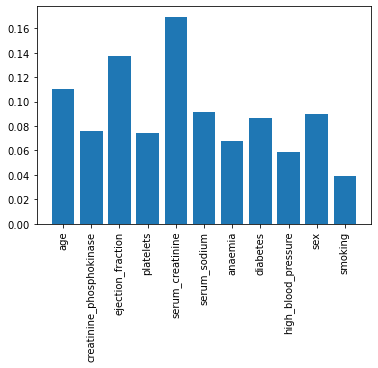

In [129]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot
plt.bar(X.columns,model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## time 변수는 data leakage임

- time 변수에는 Death Event 발생에 대한 정보가 이미 포함되어 있음
- time 변수는 사망결과를 보았기 때문에 time이 이미 결정되어 있는 변수임
- 분류 모델에 혼란을 줄 수 있는 변수임
- 즉 모델이 train data 외의 정보를 통해 학습되는 것을 말한다 이러한 경우가 발생하면 엉뚱한 모델이 만들어질 가능성이 높아진다

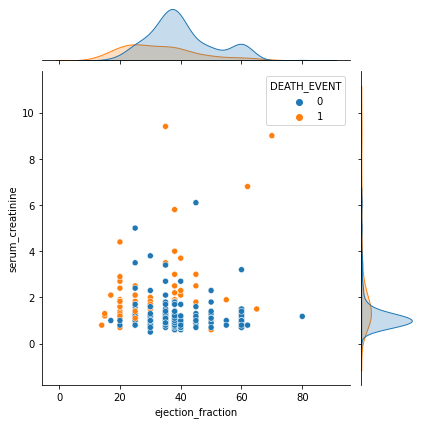

In [130]:
# 중요 변수 파악하기
sns.jointplot(x='ejection_fraction',y='serum_creatinine',data=df,hue='DEATH_EVENT')

## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Precision-Recall 커브 확인하기

In [131]:
from sklearn.metrics import plot_precision_recall_curve

# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)

- Recall(재현율)

양성일때 올바르게 모델이 양성으로 분류한 비율 즉 "진짜 양성 비율"

- 정밀도(Precision)

모델이 양성으로 분류한 샘플 중에서 실제로 양성인 샘플의 비율 "양성 예측의 정확도"




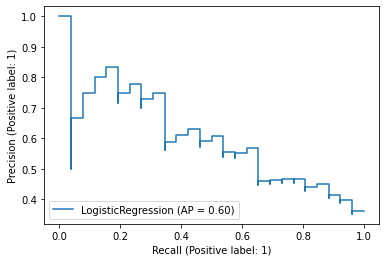

In [132]:
plot_precision_recall_curve(model_lr,X_test,y_test)

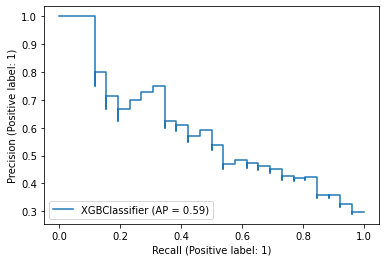

In [133]:
plot_precision_recall_curve(model_xgb,X_test,y_test)

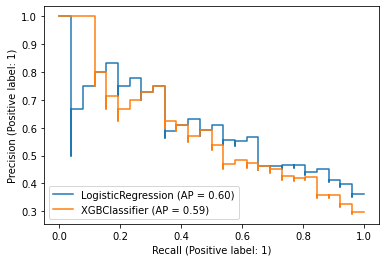

In [135]:
fig=plt.figure()
ax=fig.gca()
plot_precision_recall_curve(model_lr,X_test,y_test, ax=ax)
plot_precision_recall_curve(model_xgb,X_test,y_test, ax=ax)

### 문제 15. ROC 커브 확인하기

In [136]:
from sklearn.metrics import plot_roc_curve

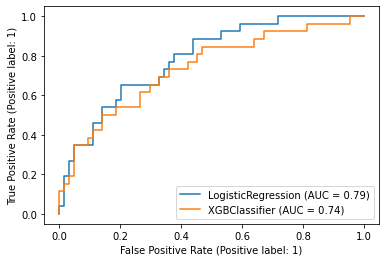

In [137]:
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
fig=plt.figure()
ax=fig.gca()
plot_roc_curve(model_lr,X_test,y_test, ax=ax)
plot_roc_curve(model_xgb,X_test,y_test, ax=ax)